# Dr.Semmelweis Handwashing Discovery
<br>
<img src="https://i.imgur.com/gugIA5r.png" width=700>

### The Data Source

Dr Semmelweis published his research in 1861. I found the scanned pages of the [English translation can be found here](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf).

The Tragic Story of Dr Semmelweis

Gather round, gather round. Now I'll tell you how our story ends. Despite the incredible evidence in favour of Dr Semmelweis' theory - that childbed fever was caused by some "substance" (which today we know as bacteria) from autopsy room corpses - was rejected by the medical community at the time. But why?! 

Part of the reason is that Semmelweis was not very tactful. He made it look like doctors were giving childbed fever to women (which they in fact were). This is not something people wanted to hear.

However, he also published his data in the form of long tables without any data visualisations:
The long tables made it very hard to see what's actually going on! Also, at the time statistics and statistical arguments were quite uncommon in the field of medicine.

Eventually, Dr Semmelweis belligerent campaigning made him some powerful and influential enemies. He lost his job at the Vienna hospital, and doctors gave up washing their hands with chlorine. As Dr Semmelweis grew older he got even angrier and eventually quite "strange". This was either the immense frustration or possibly a result of another disease like Alzheimer's or syphilis. In 1965, at the age of 47, Dr Semmelweis was committed to a mental asylum. And at the asylum, he was probably beaten since he eventually died of sepsis, a complication of an infection in the bloodstream. The tragic irony is that sepsis is a similar kind of disease that he fought so hard to prevent in women who died from childbed fever. It wasn't until 20 years later with Louis Pasteur's work on germ theory that Dr Semmelweis' work gained acceptance.
<br><br>
Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

### Let's start with our Data From The History

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.io as pio
pio.renderers.default = "notebook_connected"

%matplotlib inline

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Data Exploration

In [4]:
df_yearly.shape

(12, 4)

In [5]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [6]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


In [7]:
df_monthly.shape

(98, 3)

In [8]:
df_monthly

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2
...,...,...,...
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12


In [9]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### Check for Nan Values and Duplicates

In [10]:
df_monthly.isna().values.any()

False

In [11]:
df_monthly.duplicated().values.any()

False

In [12]:
df_yearly.isna().values.any()

False

In [13]:
df_yearly.duplicated().values.any()

False

### Descriptive Statistics

In [14]:
df_monthly.describe()

,date,births,deaths
count,98,98.00,98.00
mean,1845-02-11 04:24:29.387755008,267.00,22.47
min,1841-01-01 00:00:00,190.00,0.00
25%,1843-02-08 00:00:00,242.50,8.00
50%,1845-02-15 00:00:00,264.00,16.50
75%,1847-02-22 00:00:00,292.75,36.75
max,1849-03-01 00:00:00,406.00,75.00
std,NaN,41.77,18.14


In [15]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, calculate the percentage of women giving birth who died throughout the 1840s at the hospital.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [16]:
mot_died_percentage = df_yearly.deaths.sum() /df_yearly.births.sum() * 100
mot_died_percentage

7.083762852536147

# Visualise the Total Number of Births 🤱 and Deaths 💀 over Time
Plot the Monthly Data on Twin Axes

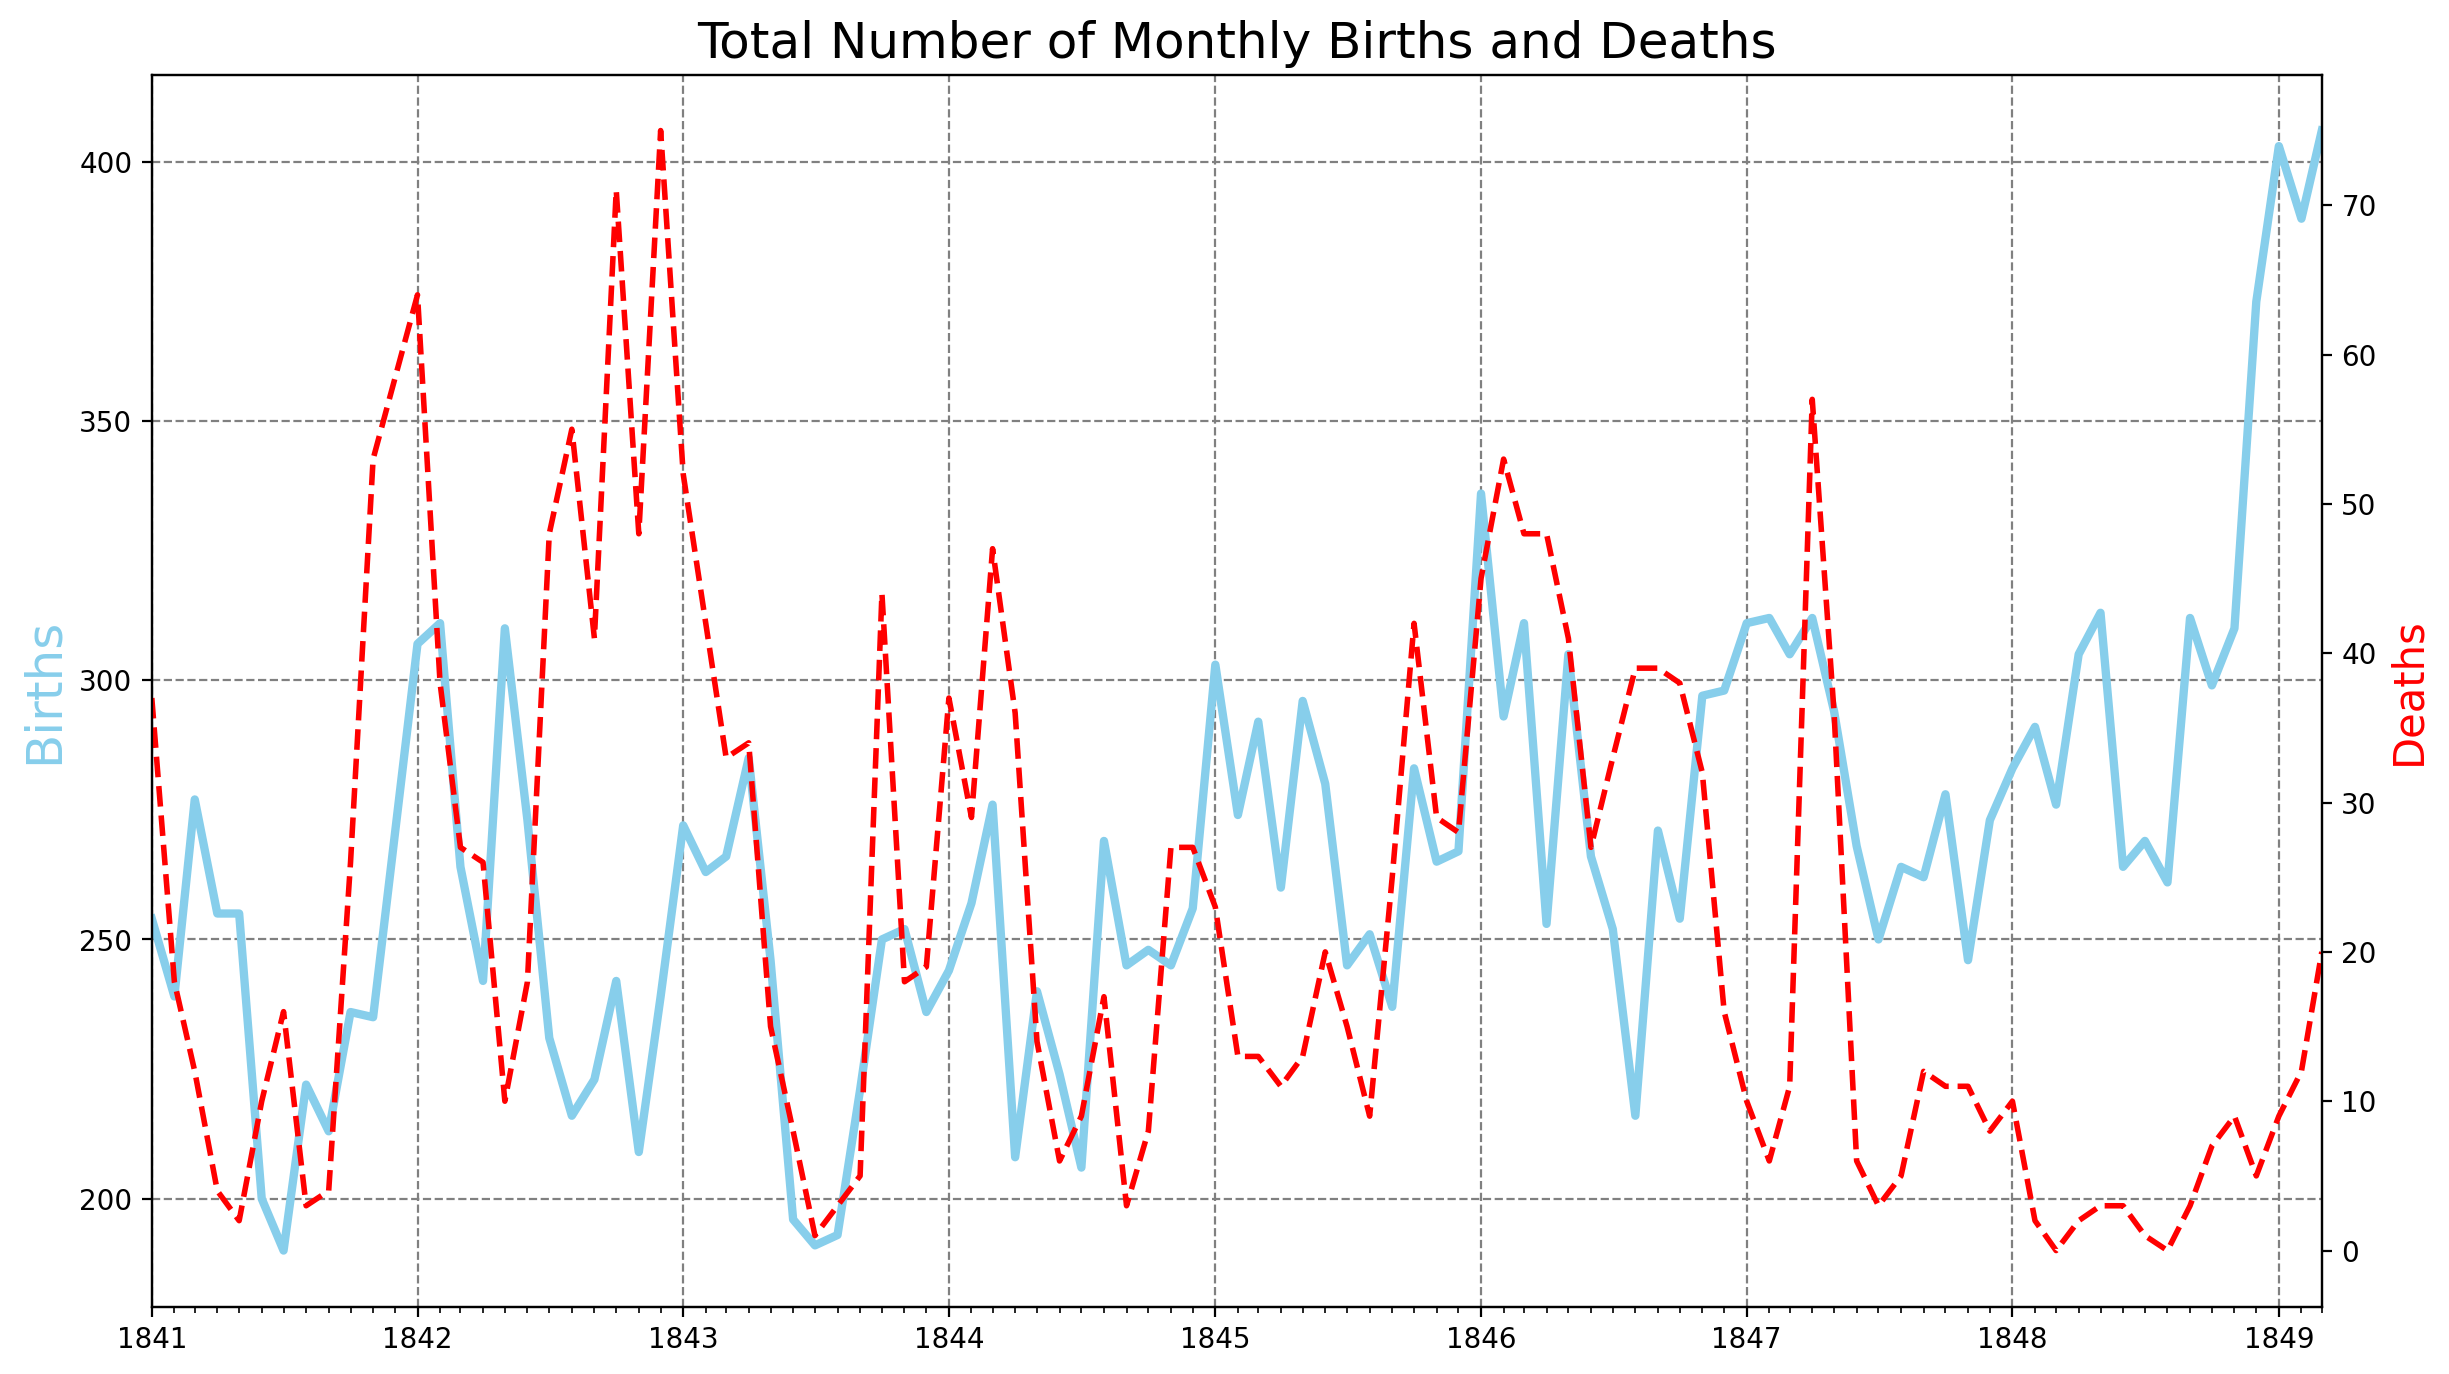

In [17]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Total Number of Monthly Births and Deaths', fontsize=18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_xlim(df_monthly.date.min(),df_monthly.date.max())

ax1.set_ylabel('Births',color='skyblue',fontsize=18)
ax2.set_ylabel('Deaths',color='red',fontsize=15)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

ax1.grid(color='gray',linestyle='--')

ax1.plot(df_monthly.date,
        df_monthly.births,
        color='skyblue',
        linewidth=3)

ax2.plot(df_monthly.date,
        df_monthly.deaths,
        color='red',
         linestyle='--',
        linewidth=2)


plt.show()

What we see is that something happened after 1847. The total number of deaths seems to have dropped, despite an increasing number of births.<br><br><br><br>

# The Yearly Data Split by Clinic

In [18]:
birth_plot = px.line(df_yearly,
                          x=df_yearly.year,
                          y=df_yearly.births,
                          color='clinic',
                          title='Total no of births by Clinic'
                          )
birth_plot.show()

Clinic 1, which was staffed by male doctors and medical students was also the busier or simply the larger ward.<br>More births took place in clinic 1 than in clinic 2.<br><br><br><br>

In [19]:
death_plot = px.line(df_yearly,
                          x=df_yearly.year,
                          y=df_yearly.deaths,
                          color='clinic',
                          title='Total no of Deaths by Clinic'
                          )
death_plot.show()

In [20]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


### The Proportion of Deaths at Each Clinic

In [21]:
des = df_yearly.describe()
des.reset_index(inplace=True)

In [22]:
des

,index,year,births,deaths
0,count,12.00,12.00,12.00
1,mean,"1,843.50","3,152.75",223.33
2,std,1.78,449.08,145.38
3,min,"1,841.00","2,442.00",66.00
4,25%,"1,842.00","2,901.75",100.25
5,50%,"1,843.50","3,108.50",219.50
6,75%,"1,845.00","3,338.25",263.50
7,max,"1,846.00","4,010.00",518.00


In [23]:
df_yearly

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1
5,1846,4010,459,clinic 1
6,1841,2442,86,clinic 2
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2


In [24]:
df_yearly['pct_deaths'] = df_yearly.deaths / df_yearly.births * 100
df_yearly

,year,births,deaths,clinic,pct_deaths
0,1841,3036,237,clinic 1,7.81
1,1842,3287,518,clinic 1,15.76
2,1843,3060,274,clinic 1,8.95
3,1844,3157,260,clinic 1,8.24
4,1845,3492,241,clinic 1,6.90
5,1846,4010,459,clinic 1,11.45
6,1841,2442,86,clinic 2,3.52
7,1842,2659,202,clinic 2,7.60
8,1843,2739,164,clinic 2,5.99
9,1844,2956,68,clinic 2,2.30


In [25]:
line = px.line(df_yearly, 
               x='year', 
               y='pct_deaths',
               color='clinic',
               title='Proportion of Yearly Deaths by Clinic')
 
line.show()

In [26]:
clinic_1 = df_yearly[df_yearly['clinic'] == 'clinic 1']
avrg_c1 = clinic_1.deaths.sum() / clinic_1.births.sum() *100
print(f'the Average Death rate in clinic 1 is {avrg_c1:.3}%')

the Average Death rate in clinic 1 is 9.92%


In [27]:
clinic_2 = df_yearly[df_yearly['clinic'] == 'clinic 2']
avrg_c2 = clinic_2.deaths.sum() / clinic_2.births.sum() *100
print(f'the Average Death rate in clinic 2 is {avrg_c2:.3}%')

the Average Death rate in clinic 2 is 3.88%


9.92%. In comparison, clinic 2 which was staffed by midwives had a much lower death rate of 3.88% over the course of the entire period.<br><br><br><br>
At first, Dr Semmelweis thought that the position of the women giving birth was the issue. In clinic 2, the midwives' clinic, women gave birth on their sides. In the doctors' clinic, women gave birth on their backs. So, Dr. Semmelweis, had women in the doctors' clinic give birth on their sides. However, this had no effect on the death rate.

Next, Dr Semmelweis noticed that whenever someone on the ward died, a priest would walk through clinic 1, past the women's beds ringing a bell 🔔. Perhaps the priest and the bell ringing terrified the women so much after birth that they developed a fever, got sick and died. Dr Semmelweis had the priest change his route and stop ringing the bell 🔕. Again, this had no effect.

At this point, Dr Semmelweis was so frustrated he went on holiday to Venice. Perhaps a short break would clear his head. When Semmelweis returned from his vacation, he was told that one of his colleagues, a pathologist, had fallen ill and died. His friend had pricked his finger while doing an autopsy on a woman who had died from childbed fever and subsequently got very sick himself and died.

Looking at the pathologist's symptoms, Semmelweis realised the pathologist died from the same thing as the women he had autopsied. This was his breakthrough: anyone could get sick from childbed fever, not just women giving birth!

This is what led to Semmelweis' new theory. Perhaps there were little pieces or particles of a corpse that the doctors and medical students were getting on their hands while dissecting the cadavers during an autopsy. And when the doctors delivered the babies in clinic 1, these particles would get inside the women giving birth who would then develop the disease and die.<br><br><br><br>

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).<br><br>
In June 1846, Dr Semmelweis ordered everyone on his medical staff to start cleaning their hands and instruments not just with soap and water but with a chlorine solution (he didn't know it at the time, but chlorine is an amazing disinfectant). The reason Dr Semmelweis actually chose the chlorine was that he wanted to get rid of any smell on doctors' hands after an autopsy. No one knew anything about bacteria, germs or viruses at the time.

In [28]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')
handwashing_start

Timestamp('1847-06-01 00:00:00')

In [29]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [30]:
df_monthly['pct_deaths'] = df_monthly.deaths / df_monthly.births * 100
df_monthly

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78
...,...,...,...,...
93,1848-11-01,310,9,2.90
94,1848-12-01,373,5,1.34
95,1849-01-01,403,9,2.23
96,1849-02-01,389,12,3.08


In [31]:
before_handwashing = df_monthly[df_monthly.date < handwashing_start]
after_handwashing = df_monthly[df_monthly.date >= handwashing_start]

before_rate = before_handwashing.deaths.sum() / before_handwashing.births.sum() *100
after_rate = after_handwashing.deaths.sum() / after_handwashing.births.sum() *100

print(f'Average death rate BEFORE 1847 was {before_rate:.4}%')
print(f'Average death rate AFTER 1847 was {after_rate:.3}%')

Average death rate BEFORE 1847 was 10.53%
Average death rate AFTER 1847 was 2.15%


In [32]:
before_handwashing.head()

,date,births,deaths,pct_deaths
0,1841-01-01,254,37,14.57
1,1841-02-01,239,18,7.53
2,1841-03-01,277,12,4.33
3,1841-04-01,255,4,1.57
4,1841-05-01,255,2,0.78


In [33]:
after_handwashing.head()

,date,births,deaths,pct_deaths
76,1847-06-01,268,6,2.24
77,1847-07-01,250,3,1.20
78,1847-08-01,264,5,1.89
79,1847-09-01,262,12,4.58
80,1847-10-01,278,11,3.96


## Rolling Average of the Death Rate
#### Highlighting Subsections of a Line Chart

In [34]:
roll_avg = before_handwashing.set_index('date')
roll_avg = roll_avg.rolling(window=6).mean()
roll_avg

,births,deaths,pct_deaths
date,,,
1841-01-01,NaN,NaN,NaN
1841-02-01,NaN,NaN,NaN
1841-03-01,NaN,NaN,NaN
1841-04-01,NaN,NaN,NaN
1841-05-01,NaN,NaN,NaN
...,...,...,...
1847-01-01,274.50,29.00,11.13
1847-02-01,290.50,23.50,8.44
1847-03-01,296.17,18.83,6.64


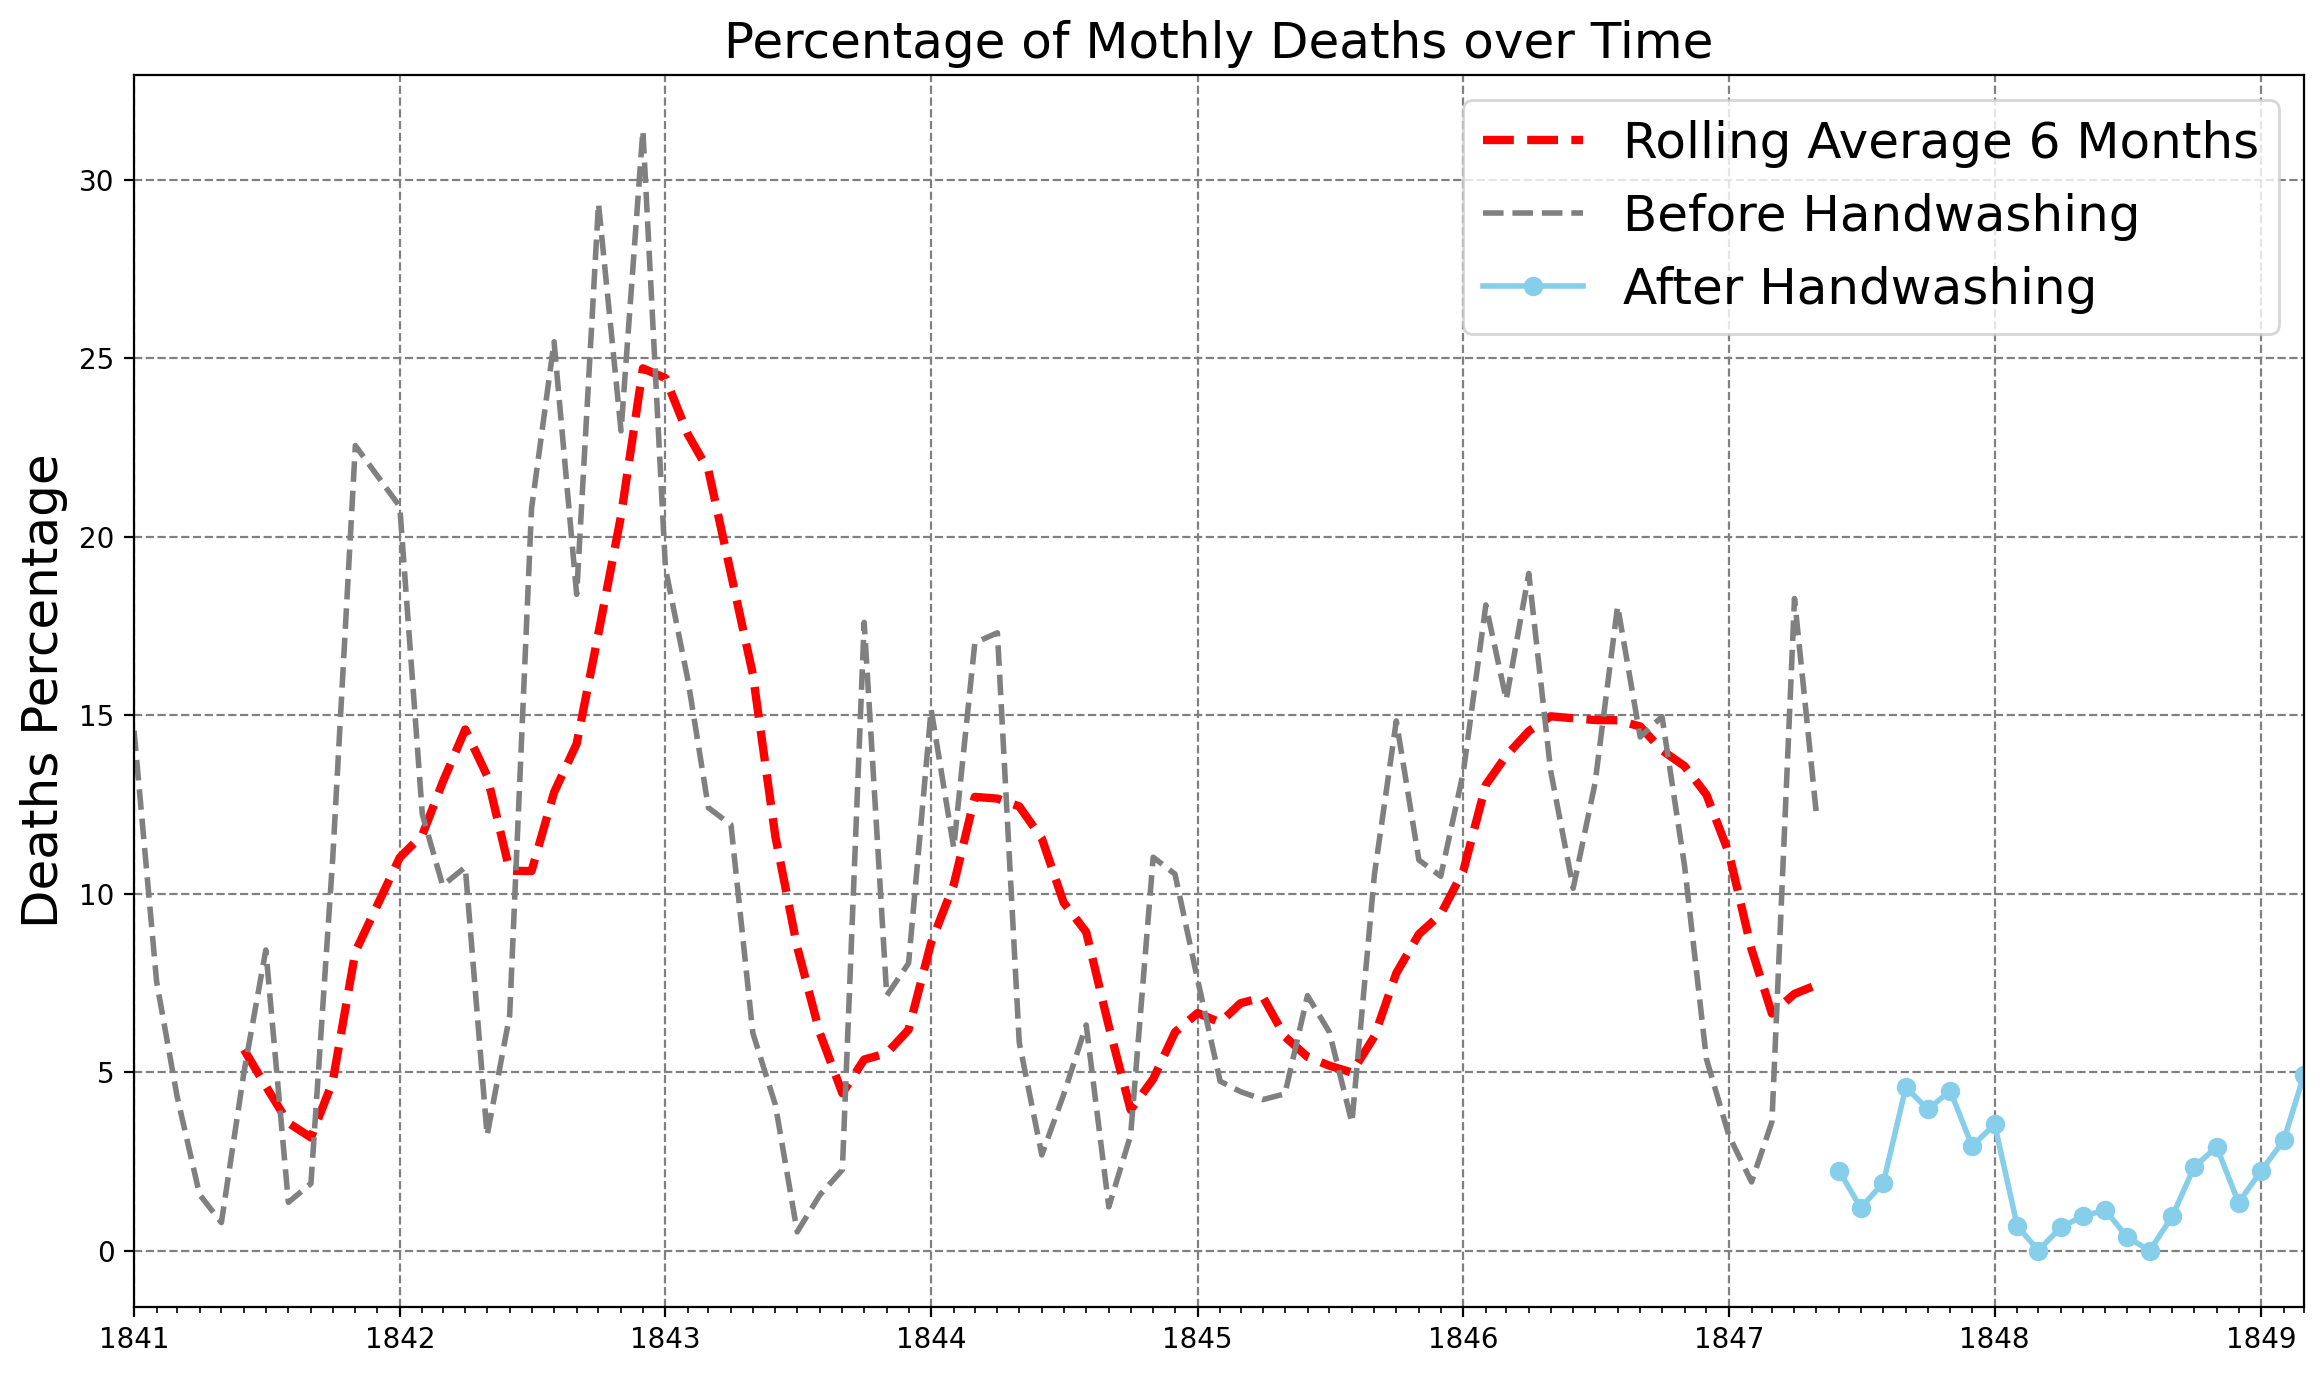

In [35]:
plt.figure(figsize=(14,8), dpi=200)
plt.title('Percentage of Mothly Deaths over Time', fontsize=18)
plt.ylabel('Deaths Percentage',fontsize=18)


ax = plt.gca()

ax.set_xlim(df_monthly.date.min(),df_monthly.date.max())


# ax2.set_ylabel('Deaths',color='red',fontsize=15)

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(year_fmt)
ax.xaxis.set_minor_locator(months)

plt.grid(color='gray',linestyle='--')


rolling_6months, = plt.plot(roll_avg.index,
                           roll_avg.pct_deaths,
                           color='red',
                           linestyle='--',
                           linewidth=3,
                           label='Rolling Average 6 Months'
                          )

before_line, = plt.plot(before_handwashing.date,
                       before_handwashing.pct_deaths,
                       color='gray',
                       linestyle='--',
                       linewidth=2,
                       label='Before Handwashing'
                      )

after_line, = plt.plot(after_handwashing.date,
                      after_handwashing.pct_deaths,
                      color='skyblue',
                      marker='o',
                      linewidth=2,
                      label='After Handwashing'
)

plt.legend(handles=[rolling_6months,
                    before_line,
                    after_line],
           fontsize=18
          )

plt.show()

### Statistics - Difference in the Average Monthly Death Rate

In [36]:
avrg_before_death = before_handwashing.pct_deaths.mean()
print(f'The chances of death rate before handwashing: {avrg_before_death:.3}% ')

The chances of death rate before handwashing: 10.5% 


In [37]:
avrg_after_death = after_handwashing.pct_deaths.mean()
print(f'the chances of death rate after handwashing : {avrg_after_death:.3}%')

the chances of death rate after handwashing : 2.11%


In [38]:
mean_diff_handwashing = avrg_before_death - avrg_after_death
print(f'Handwashing is reduced by monthly propositon of death by : {mean_diff_handwashing:.3}%')

Handwashing is reduced by monthly propositon of death by : 8.4%


In [39]:
times_diff_handwashing = avrg_before_death / avrg_after_death
print(f'thats {times_diff_handwashing:.2}x times difference')

thats 5.0x times difference


A lot of statistical tests rely on comparing features of distributions, like the mean. We see that the average death rate before handwashing was 10.5%. After handwashing was made obligatory, the average death rate was 2.11%. The difference is massive. Handwashing decreased the average death rate by 8.4%, a 5x improvement.
<br><br><br><br>

### Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [40]:
df_monthly['handwashing'] = np.where(df_monthly.date < handwashing_start, 'No','Yes')
df_monthly

,date,births,deaths,pct_deaths,handwashing
0,1841-01-01,254,37,14.57,No
1,1841-02-01,239,18,7.53,No
2,1841-03-01,277,12,4.33,No
3,1841-04-01,255,4,1.57,No
4,1841-05-01,255,2,0.78,No
...,...,...,...,...,...
93,1848-11-01,310,9,2.90,Yes
94,1848-12-01,373,5,1.34,Yes
95,1849-01-01,403,9,2.23,Yes
96,1849-02-01,389,12,3.08,Yes


In [41]:
handwashing_diff_box = px.box(df_monthly,x=df_monthly.handwashing,
                             y=df_monthly.pct_deaths,
                             color=df_monthly.handwashing)

handwashing_diff_box.update_layout(xaxis_title='Washing Hands ?',
                                  yaxis_title='Monthly Death Percentage')

handwashing_diff_box.show()


Here we also see the massive spike in deaths in late 1842. Over 30% of women who gave birth that month died in hospital. What we also see in the box plot is how not only did the average death rate come down, but so did the overall range - we have a lower max and 3rd quartile too.
<br><br><br><br>

### Use Histograms to Visualise the Monthly Distribution of Outcomes

In [42]:
hist = px.histogram(df_monthly, 
                   x='pct_deaths', 
                   color='handwashing',
                   nbins=30,
                   opacity=0.6,
                   barmode='overlay',
                   histnorm='percent',
                   marginal='box',)
 
hist.update_layout(xaxis_title='Proportion of Monthly Deaths',
                   yaxis_title='Count',)
 
hist.show()

Now, we have only about 98 data points or so, so our histogram looks a bit jagged. It's not a smooth bell-shaped curve. However, we can estimate what the distribution would look like with a Kernel Density Estimate (KDE).
<br><br><br><br>

### Use a Kernel Density Estimate (KDE) to visualise a smooth distribution

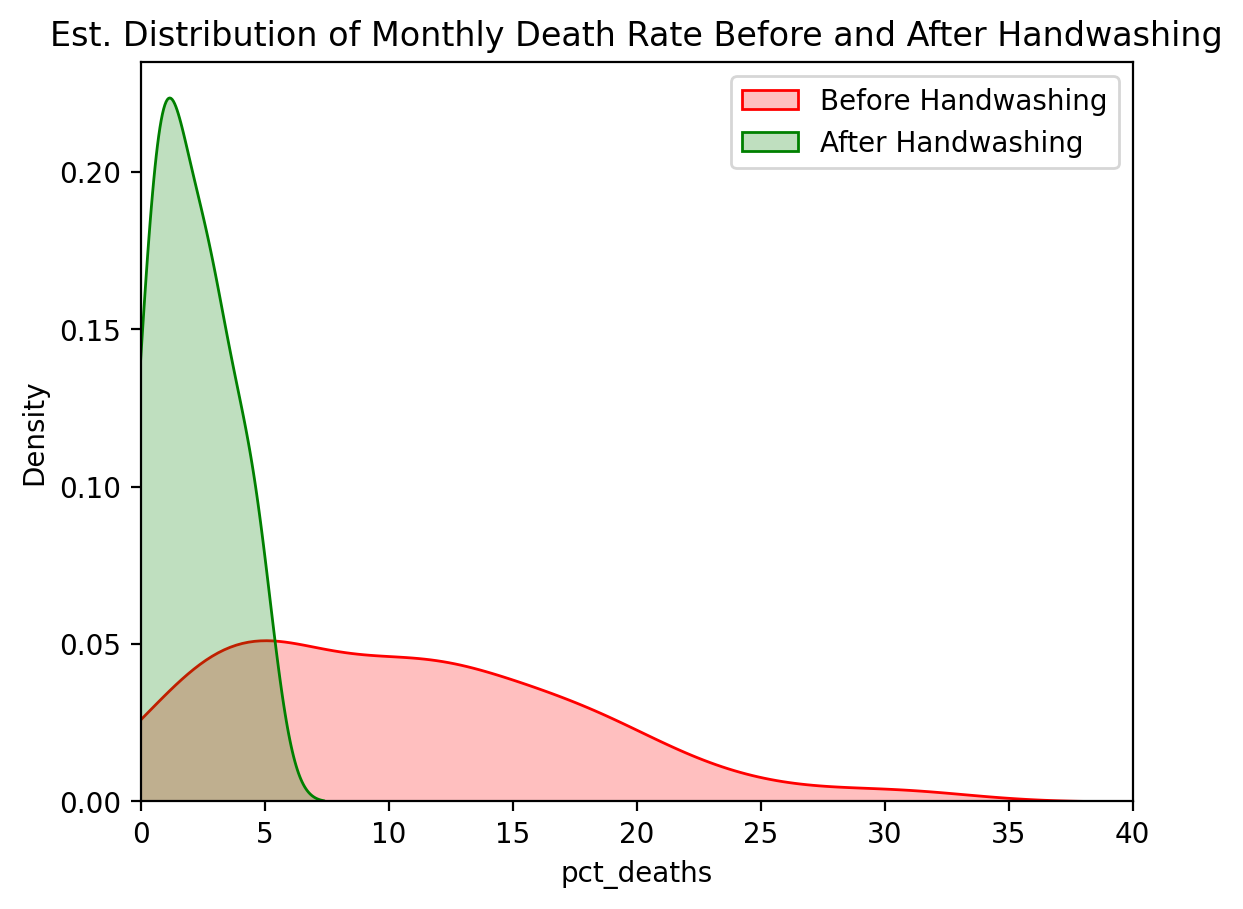

In [43]:
plt.figure(dpi=200)
sns.kdeplot(before_handwashing.pct_deaths, 
            color='red',
            fill=True,
            label='Before Handwashing'
            )
sns.kdeplot(after_handwashing.pct_deaths,
            color='green',
            fill=True,
            label='After Handwashing'
            )
plt.title('Est. Distribution of Monthly Death Rate Before and After Handwashing')
plt.xlim(0,40)
plt.legend()
plt.show()

Now that we have an idea of what the two distributions look like, we can further strengthen our argument for handwashing by using a statistical test. We can test whether our distributions ended up looking so different purely by chance (i.e., the lower death rate is just an accident) or if the 8.4% difference in the average death rate is statistically significant.
<br><br><br><br>

### Use a T-Test to Show Statistical Significance

Use a t-test to determine if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate.

In [44]:
t_stat, p_value = stats.ttest_ind(a=before_handwashing.pct_deaths, 
                                  b=after_handwashing.pct_deaths)

print(f'p-palue is {p_value:.10f}')
print(f't-statstic is {t_stat:.4}')

p-palue is 0.0000002985
t-statstic is 5.512


When we calculate the p_value we see that it is 0.0000002985 or .00002985% which is far below even 1%. In other words, the difference in means is highly statistically significant<br><br>
conclude from your analysis ? 

<img src=https://i.imgur.com/rvjNVzQ.gif>

Washing Our Hands and Prevent From Bacteria 🦠